# Python Applications: GeoPandas Data Exploration

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import rasterio

- Libraries generally have tutorials and detailed documentation available.
- The most important part of learning to code is how capable you are at using your search engine.

# Basic Operations on GIS Data

In this cell, we begin by loading a vector dataset containing borehole information using GeoPandas, a useful package that brings spatial data handling to the world of pandas.

Step-by-Step Actions:

- Define Data Path: source_boreholes stores the relative path to a shapefile (*.shp) containing borehole locations.

- Load with read_file(): gpd.read_file() reads the shapefile into a GeoDataFrame (df_boreholes), preserving both attribute and geometry data.

- Inspect with .info(): This method displays a summary of the dataset, including:

    - Number of entries (e.g., boreholes)

    - Data types and memory usage

    - Column names and non-null counts

In [2]:
# Define the path to the file
source_boreholes = './data/GIS/UFS_Boreholes.shp'
# Feed the path to the file to the Geopandas Read File function
df_boreholes = gpd.read_file(source_boreholes)
# Let us display some basic information of the loaded shapefile
df_boreholes.info()
# These methods are very useful when working with large data sets,
# where GIS software can slow down significantly due to the rendering.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          48 non-null     object  
 1   CollarHeig  41 non-null     float64 
 2   Diameter    41 non-null     float64 
 3   Radius      41 non-null     float64 
 4   Depth       41 non-null     float64 
 5   TopElevati  41 non-null     float64 
 6   BotElevati  41 non-null     float64 
 7   xcoord      48 non-null     float64 
 8   ycoord      48 non-null     float64 
 9   zcoord      48 non-null     float64 
 10  geometry    48 non-null     geometry
dtypes: float64(9), geometry(1), object(1)
memory usage: 4.3+ KB


In [3]:
# Similar to regular Pandas:
# We can also request a description of the shapefile which will give statistics for the included data
df_boreholes.describe()

,CollarHeig,Diameter,Radius,Depth,TopElevati,BotElevati,xcoord,ycoord,zcoord
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,48.000000,48.000000,48.000000
mean,0.202683,0.162195,0.081098,31.320732,1411.830439,1380.504341,26.188159,-29.107433,1205.765375
std,0.116641,0.024032,0.012016,11.499038,0.743290,11.698224,0.002327,0.001726,503.491402
min,0.000000,0.090000,0.045000,9.000000,1410.645000,1346.857000,26.178850,-29.112514,0.000000
25%,0.170000,0.170000,0.085000,23.000000,1411.370000,1370.753000,26.188666,-29.107112,1410.960000
50%,0.220000,0.170000,0.085000,30.000000,1411.720000,1381.440000,26.189068,-29.106799,1411.265000
75%,0.270000,0.170000,0.085000,41.000000,1411.940000,1389.330000,26.189159,-29.106690,1411.720000
max,0.400000,0.170000,0.085000,65.000000,1413.900000,1401.930000,26.189656,-29.106455,1413.900000


In [4]:
# If we want to know the coordinate reference system of the shapefile it only requires a single command
df_boreholes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
# We can also just request the geometry of the object, disregarding any attached data
df_boreholes.geometry.head()

0     POINT Z (26.18916 -29.1067 1411.128)
1    POINT Z (26.18921 -29.10652 1411.069)
2    POINT Z (26.18926 -29.10655 1411.044)
3    POINT Z (26.18917 -29.10665 1411.084)
4    POINT Z (26.18916 -29.10667 1411.104)
Name: geometry, dtype: geometry

In [6]:
# This will be the primary way of viewing the data
df_boreholes.head(10)
# The head command displays the fist 5 records in the dataset, we modify it to show 10

,ID,CollarHeig,Diameter,Radius,Depth,TopElevati,BotElevati,xcoord,ycoord,zcoord,geometry
0,UO5,0.22,0.17,0.085,41.0,1411.348,1370.128,26.189158,-29.106695,1411.128,POINT Z (26.18916 -29.1067 1411.128)
1,UO1,0.33,0.17,0.085,21.0,1411.399,1390.399,26.189206,-29.106521,1411.069,POINT Z (26.18921 -29.10652 1411.069)
2,UO2,0.27,0.17,0.085,41.0,1411.314,1370.314,26.189260,-29.106552,1411.044,POINT Z (26.18926 -29.10655 1411.044)
3,UO3,0.23,0.17,0.085,53.0,1411.314,1358.314,26.189167,-29.106651,1411.084,POINT Z (26.18917 -29.10665 1411.084)
4,UO4,0.40,0.17,0.085,41.0,1411.504,1370.504,26.189162,-29.106672,1411.104,POINT Z (26.18916 -29.10667 1411.104)
5,UO7,0.24,0.17,0.085,41.0,1411.511,1370.511,26.189094,-29.106727,1411.271,POINT Z (26.18909 -29.10673 1411.271)
6,UO8,0.23,0.17,0.085,41.0,1411.435,1370.435,26.189109,-29.106679,1411.205,POINT Z (26.18911 -29.10668 1411.205)
7,UO9,0.28,0.17,0.085,41.0,1411.452,1370.452,26.189119,-29.106640,1411.172,POINT Z (26.18912 -29.10664 1411.172)
8,UO10,0.00,0.17,0.085,49.0,1410.645,1361.645,26.189656,-29.106651,1410.645,POINT Z (26.18966 -29.10665 1410.645)
9,UO11,0.21,0.17,0.085,41.0,1411.753,1370.753,26.189414,-29.106973,1411.543,POINT Z (26.18941 -29.10697 1411.543)


In [7]:
# We can evoke the explore method to visualize our data
# The default tiles for explore is Open Street Map
df_boreholes.explore()

Let us calculate the distance between two boreholes on the map. But first, we need to change to a projected CRS:

In [8]:
# First we need to convert the CRS of the boreholes
# from a geographic CRS to a projected CRS
df_boreholes_Merc = df_boreholes.to_crs(3395) # WGS84 / World Mercator
# Save the newly projected file to a geopackage.
df_boreholes_Merc.to_file('./output/UFS_Boreholes_Merc.gpkg',
                           driver='GPKG',
                           layer='boreholes')
# Let us make sure the CRS change has taken effect.
df_boreholes_Merc.crs

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Next, we isolate and display the records for two specific boreholes using attribute filtering.

What’s happening:

- Define Borehole IDs: Stores the identifiers of two target boreholes, 'UO10' and 'UO24', into borehole_name_a and borehole_name_b.

- Filter GeoDataFrame:

    - Uses .loc[] indexing with a conditional filter (['ID'] == borehole_name) to extract matching records from df_boreholes_Merc.

    - These filters yield two new GeoDataFrames: borehole_a and borehole_b, each containing a single record.

- Display Borehole Info: print(borehole_a.head()) shows the attribute and geometry data of the selected borehole to confirm the filter was successful.

In [9]:
# Add the identifiers of the boreholes in question
borehole_name_a = 'UO10'
borehole_name_b = 'UO24'
# Get the boreholes from the shapefile
borehole_a = df_boreholes_Merc.loc[
    df_boreholes_Merc['ID'] == borehole_name_a
]
borehole_b = df_boreholes_Merc.loc[
    df_boreholes_Merc['ID'] == borehole_name_b
]
# Print the information of the boreholes
print(borehole_a.head())

     ID  CollarHeig  Diameter  Radius  Depth  TopElevati  BotElevati  \
8  UO10         0.0      0.17   0.085   49.0    1410.645    1361.645   

      xcoord     ycoord    zcoord                                     geometry  
8  26.189656 -29.106651  1410.645  POINT Z (2915419.182 -3368446.649 1410.645)  


In [10]:
# Print the information of the second borehole
print(borehole_b.head())
# Not how the geometry has different coordinates
# This is due to the CRS transformation, but geopandas will keep the original values in the shapefile.

      ID  CollarHeig  Diameter  Radius  Depth  TopElevati  BotElevati  \
23  UO24         0.0      0.17   0.085   28.0      1413.9      1385.9   

       xcoord     ycoord  zcoord                                  geometry  
23  26.188158 -29.107538  1413.9  POINT Z (2915252.43 -3368559.133 1413.9)  


Now that we've isolated the two boreholes of interest, next we use GeoPandas to calculate the Euclidean (straight-line) distance between them in meters.

How It Works:

- .distance() Method: Computes the shortest distance between the geometries of borehole_a and borehole_b.

- The parameter align=False ensures the distance is calculated across full GeoDataFrames without requiring index alignment. This is essential when comparing two single-row frames.

- Accessing the Result: The result is a GeoSeries with a single value, so we extract it with .iloc[0], cast it to float, and round it to two decimal places for readability.

In [11]:
# Calculate the distance between borehole a and borehole b
distance_between = borehole_a.distance(borehole_b, align=False)
# Print the calculated distance
print(f"Distance between {borehole_name_a} and {borehole_name_b}: ")
print(f"{round(float(distance_between.iloc[0]), 2)} m")

Distance between UO10 and UO24: 
201.14 m


Assume we want to clip these boreholes so that only those boreholes that occur within our study area remain. First, we need to import the boundary with which to clip our boreholes:

In [12]:
# Import our boundary polygon
cts_boundary = './data/GIS/CTS_Boundary.shp'
df_cts_boundary = gpd.read_file(cts_boundary)
# Take a look at the file
df_cts_boundary.head()

,id,geometry
0,0,"POLYGON ((79145.279 3221483.46, 79110.145 3221..."


In [13]:
# We need to make sure the two files are in the same projected CRS
# Convert to 3395 World Mercator
df_cts_boundary = df_cts_boundary.to_crs(3395)
df_cts_boundary.crs

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
# Take a look at the boundary, with Google satelite images as the base map.
df_cts_boundary.explore(tiles='https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
                          attr='Google Earth')

This cell inspects key geometric properties of the imported polygon layer.

Geometric Attributes Calculated:

- .area Calculates the polygon’s area using the coordinate reference system’s units (typically square meters if projected). This gives a quantitative sense of the model domain’s size.

- .centroid Returns the geometric center of the polygon as a Point object. This is often used for labeling, snapping, or referencing the polygon’s central location.

- .boundary Extracts the polygon’s exterior boundary as a LineString, useful for plotting outlines or for clipping/intersecting with other layers.

Always double-check that your boundary is in the right projection and has the expected area/shape before using it as a mask, domain, or buffer.

In [15]:
# Let us calculate some metrics of our polygon
print(f"Model Boundary Polygon:\nArea: {df_cts_boundary.area}")
print(f"Centroid: {df_cts_boundary.centroid}")
print(f"Boundary: {df_cts_boundary.boundary}")

Model Boundary Polygon:
Area: 0    62421.155967
dtype: float64
Centroid: 0    POINT (2915279.572 -3368520.621)
dtype: geometry
Boundary: 0    LINESTRING (2915113.99 -3368583.992, 2915155.1...
dtype: geometry


Now, we perform the spatial clip to limit the borehole dataset to only those points that fall within the defined model boundary polygon (df_cts_boundary). 

Operation Details of df_boreholes_Merc.clip(df_cts_boundary):

- Calls the .clip() method from GeoPandas, which retains only the geometries in df_boreholes_Merc that intersect the model boundary polygon.

- Returns a new GeoDataFrame, df_boreholes_cts, containing the clipped subset of boreholes.

The coordinate systems must match (i.e., both datasets should be in the same projected CRS) for this to work correctly.

In [16]:
# In order to clip the boreholes we just evoke the clip command
# on the boreholes and we pass the model boundary as the argument
df_boreholes_cts = df_boreholes_Merc.clip(df_cts_boundary)
# Let us display the results again
df_boreholes_cts.explore(tiles='https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
                          attr='Google Earth')

For our next magic trick, let's see what land use zones these boreholes are located on. First, we once again import the file containing the land use data:

In [17]:
# Let us import the land use shapefile
source_land_use = './data/GIS/CTS_LandUse.shp'
df_land_use = gpd.read_file(source_land_use)
# And preview the data
df_land_use.head()

,id,LandUseTyp,geometry
0,0,Agriculture,"POLYGON ((78957.915 3221381.238, 78923.571 322..."
1,1,Parking Lot,"POLYGON ((78970.838 3221341.035, 78994.344 322..."
2,2,Weather Station,"POLYGON ((78957.91 3221381.233, 78901.11 32214..."
3,3,Residentail,"POLYGON ((78945.008 3221324.732, 78935.699 322..."
4,4,Parking Lot,"POLYGON ((79090.969 3221335.924, 79010.507 322..."


In [18]:
# Spatial join will require all geometries to be in the same CRS
df_land_use = df_land_use.to_crs(3395)
df_land_use.crs

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
# We can also overload the explore method to visualize geospatial data
df_land_use.explore(tiles='https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
                    attr='Google Earth',
                    column="LandUseTyp",
                    cmap="rainbow")

This cell performs a spatial join that assigns land use classifications to each borehole based on its location within polygon zones.

What are we using:

- Left Table: df_boreholes_cts contains the clipped boreholes (points).

- Right Table: df_land_use[['LandUseTyp', 'geometry']] contains land use zones as polygons, with just the relevant attributes selected.

Join Operation:

- how="left" ensures that every borehole is retained in the result—even if it doesn’t intersect a land use polygon.

- predicate="within" specifies that a borehole must fall inside a polygon for the join to succeed.

- Result: The resulting df_boreholes_land_use includes a new LandUseTyp column describing the land use zone for each borehole.

Why do we include geometry in the selected columns? 

- GeoPandas requires the geometry column to be present in both dataframes during spatial joins to execute geometry-based predicates like "within" or "intersects".

In [20]:
# Perform the spatial join, notice the overloads specifying how the operation is executed
# Geometry should always be included as a selected column when performing a spatial join
df_boreholes_land_use = df_boreholes_cts.sjoin(df_land_use[['LandUseTyp', 'geometry']],
                                                   how="left",
                                                   predicate="within")
# Preview the table to confirm the spatial join
df_boreholes_land_use.head()

,ID,CollarHeig,Diameter,Radius,Depth,TopElevati,BotElevati,xcoord,ycoord,zcoord,geometry,index_right,LandUseTyp
23,UO24,0.00,0.17,0.085,28.0,1413.90,1385.90,26.188158,-29.107538,1413.90,POINT Z (2915252.43 -3368559.133 1413.9),1.0,Parking Lot
21,UO22,0.00,0.17,0.085,34.0,1413.37,1379.37,26.188530,-29.107536,1413.37,POINT Z (2915293.783 -3368558.815 1413.37),2.0,Weather Station
22,UO23,0.35,0.17,0.085,28.0,1413.48,1385.48,26.188399,-29.107273,1413.13,POINT Z (2915279.224 -3368525.478 1413.13),NaN,NaN
10,UO12,0.19,0.17,0.085,22.0,1412.83,1390.83,26.189213,-29.107276,1412.64,POINT Z (2915369.84 -3368525.889 1412.64),0.0,Agriculture
18,UO19,0.21,0.17,0.085,17.0,1412.04,1395.04,26.189153,-29.107069,1411.83,POINT Z (2915363.194 -3368499.678 1411.83),0.0,Agriculture


<Axes: title={'center': 'Boreholes by Land Use'}>

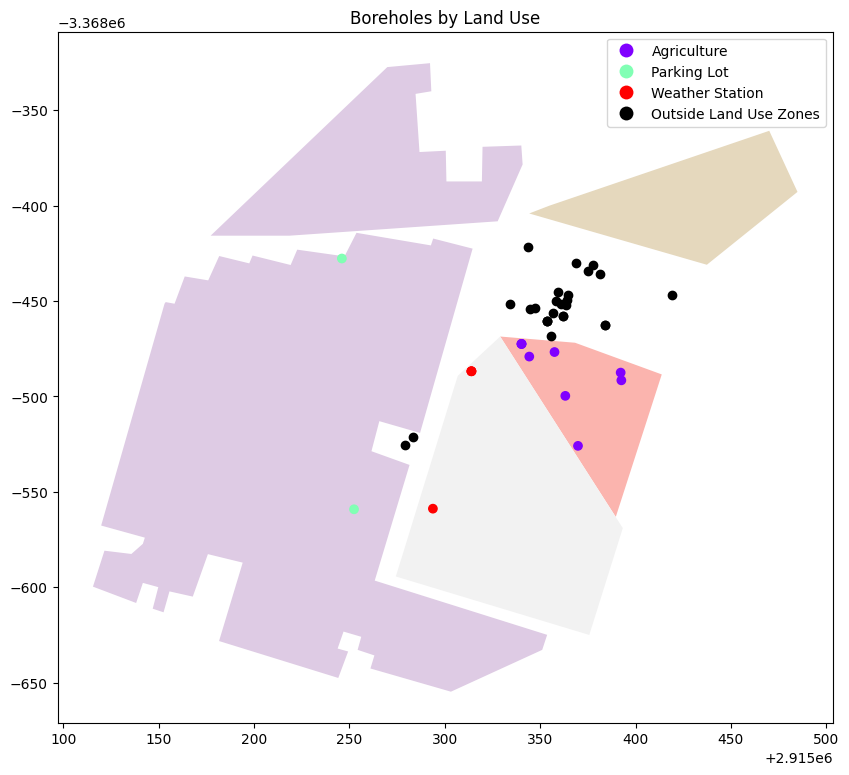

In [21]:
# Let us plot the results
fig, ax = plt.subplots(figsize=(10,10))
# Give the figure a title
ax.set_title('Boreholes by Land Use')
# Classify the points by Land Use Type column
df_land_use.plot(ax=ax, column='LandUseTyp', cmap='Pastel1')
# Plot the land use with the Type column
df_boreholes_land_use.plot(ax=ax,
                           column='LandUseTyp',
                           cmap='rainbow',
                           missing_kwds={
                               "color": "black",
                               "label": "Outside Land Use Zones"
                           },
                           legend=True)

Next, let's buffer the boreholes. The cell below describes how to generate buffer polygons around each borehole point, representing a uniform spatial zone (e.g., for zone-of-influence analysis, environmental compliance, or proximity checks).

Step-by-step breakdown:

- Copy the Source Layer:

    - df_boreholes_cts.copy() ensures that the original clipped borehole layer remains unchanged.

    - The copy is stored in df_boreholes_buffered.

- Generate Buffers:

    - The .buffer(distance=5) method creates a 5-meter circular buffer around each borehole’s geometry.

    - The new geometries overwrite the geometry column in the copied GeoDataFrame.

- Plot the Buffers:

    - plot(figsize=(5,5)) visualizes the result—each borehole now displayed as a small polygon (rather than a point).

<Axes: >

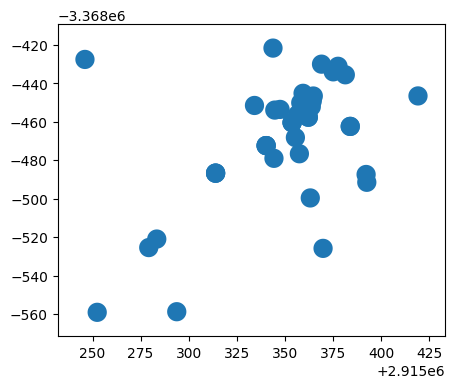

In [22]:
# Create a copy of our clipped boreholes layer
df_boreholes_buffered = df_boreholes_cts.copy()
# Buffer the boreholes, and assign the new geometry to the copied layer
df_boreholes_buffered['geometry'] = df_boreholes_cts.geometry.buffer(distance=5)
# Visualize the results
df_boreholes_buffered.plot(figsize=(5,5))

This next cell combines all individual land use polygons into a single unified geometry using GeoPandas’ geometry aggregation tool. This is especially useful when simplifying spatial layers or defining a total study area for masking, buffering, or overlay analysis.

Key Steps:

- Merge Geometries:

    - df_land_use['geometry'].unary_union merges all land use polygons into one seamless MultiPolygon or Polygon, removing internal boundaries.

    - This operation uses the Shapely engine under the hood, ensuring clean and topologically valid output.

- Create Attribute Table:

    - Constructs a simple dictionary merged_data representing the new merged feature with basic metadata (ID, Name, geometry).

- Convert to GeoDataFrame:

    - Wraps the new record in a GeoDataFrame, explicitly setting the same CRS (EPSG:3857) to ensure alignment with existing spatial layers.

- Plot:

    - Displays the result using plot(), giving a quick visual confirmation of the merged boundary.

C:\Users\Anton\AppData\Local\Temp\ipykernel_113004\1112473671.py:2: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  poly_land_use_merged = df_land_use['geometry'].unary_union


<Axes: >

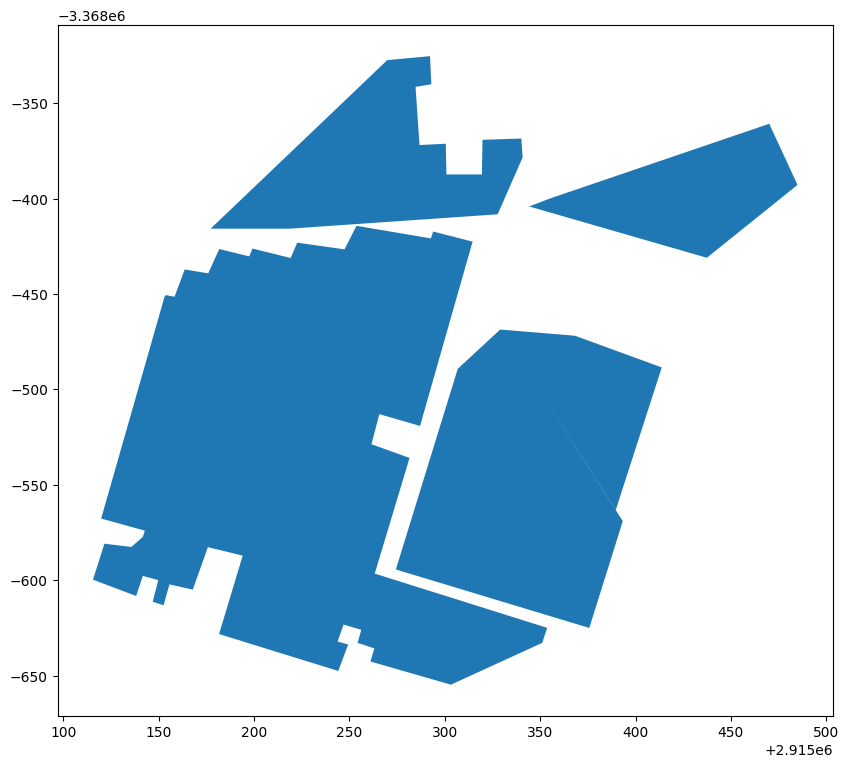

In [23]:
# Merge vectors
poly_land_use_merged = df_land_use['geometry'].unary_union
# Take the merged polygon and create a new dataframe with it
merged_data = {'ID': ['0'],
               'Name': ["Land use merged"],
               'geometry': [poly_land_use_merged]}
df_land_use_merged = pd.DataFrame(merged_data)
# The DataFrame is converted to a geopandas DataFrame.
gdf_land_use_merged = gpd.GeoDataFrame(df_land_use_merged, crs='epsg:3857')
gdf_land_use_merged.plot(figsize=(10,10))

Next, let's take a look at working with raster data using rasterio. A quick breakdown:

- src.read(1) grabs the first band — common for DEMs or intensity rasters.

- cmap='gray' renders it as a grayscale image, but you can also try colormaps like 'terrain', 'viridis', or 'plasma'.

- If it’s a multiband raster (e.g. RGB), you can read all bands and display them as an image using 'np.dstack'.

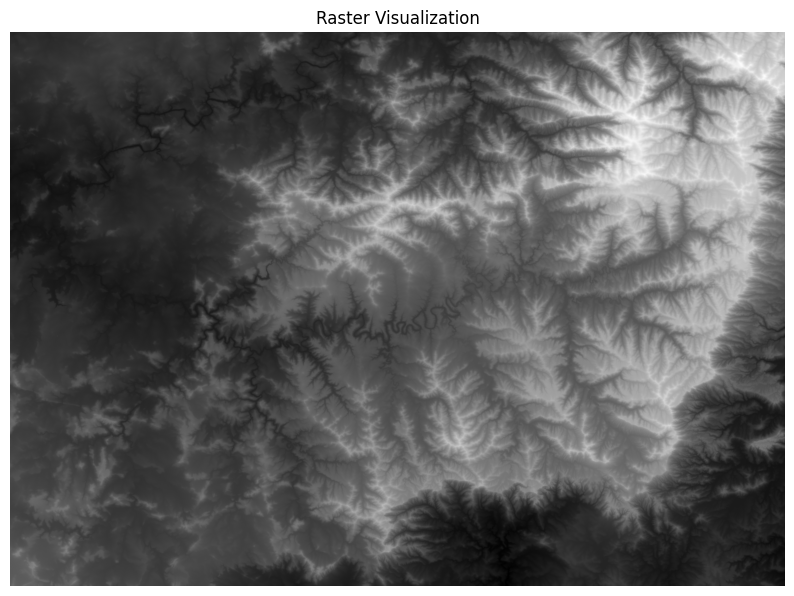

In [24]:
# Define the path to your raster file
raster_path = './data/GIS/output_AW3D30.tif'

# Open the raster using rasterio
with rasterio.open(raster_path) as src:
    raster_data = src.read(1)  # Read the first band
    raster_crs = src.crs
    raster_bounds = src.bounds
    # Mask NoData values (optional but common)
    nodata = src.nodata
    masked_raster = np.ma.masked_equal(raster_data, nodata)

# Display the raster
plt.figure(figsize=(10, 10))
plt.imshow(raster_data, cmap='gray')
plt.title("Raster Visualization")
plt.axis('off')
plt.show()

Luckily, we had a good raster and thus masking the NA values (invalid or missing data) was not necessary, but we will visualise it regardless:

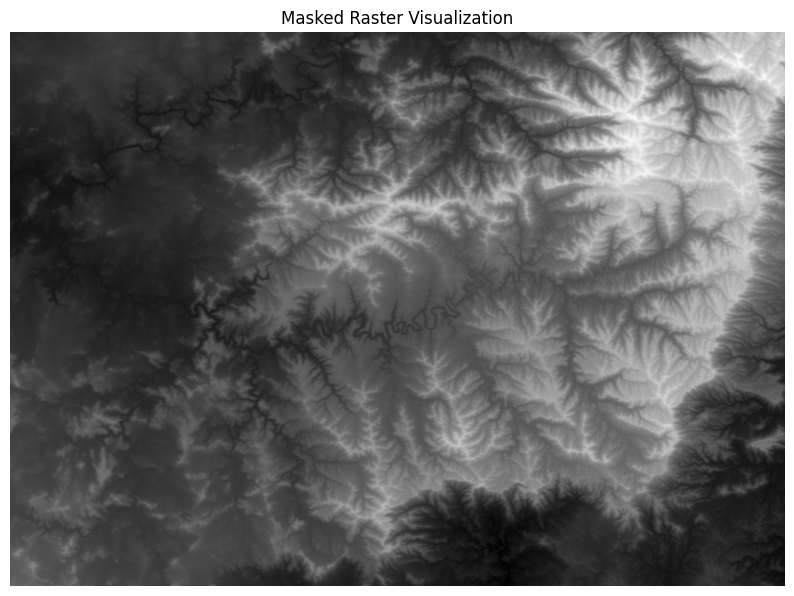

In [25]:
# Display the masked raster
plt.figure(figsize=(10, 10))
plt.imshow(masked_raster, cmap='gray')
plt.title("Masked Raster Visualization")
plt.axis('off')
plt.show()

When working with spatial grids — such as digital elevation models, rasters, or groundwater model arrays — we often need to perform large-scale mathematical operations across thousands (or millions) of grid cells. This is where NumPy becomes a game changer.

What Makes NumPy So Powerful?

- Vectorized Operations: Unlike standard Python loops, NumPy allows you to apply operations across entire arrays at once — like adding two grids or computing slopes.

- Memory Efficiency: NumPy uses compact data structures that keep memory usage low, which matters when working with high-resolution rasters or 3D model arrays. Numpy is faster than working with raw Python code because it is implemented in the C programming language.

- Broadcasting: You can apply operations across arrays of different shapes — for example, scaling each grid layer differently — without writing extra logic.

Why It’s Perfect for Spatial Modeling

- Whether you’re:

    - Applying mathematical transforms (e.g. normalizing a raster)

    - Creating masks (e.g. cells above a threshold)

    - Computing differences across time steps or layers

    - Extracting values for zonal stats

- ...NumPy allows these to happen quickly, reproducibly, and expressively.

Next, we explore how to manipulate raster data numerically after loading it with rasterio. Since raster files are essentially gridded datasets, we can apply standard NumPy operations for analysis and transformation.

# Example Calculations:

Scaling:

- Multiply the raster by 100 to convert values (e.g., from meters to centimeters).

Thresholding:

- Create a binary mask where values greater than 1000 become 1 and others become 0. This is useful for classification or visibility filtering.

Slope Approximation:

- Use np.gradient() to estimate local elevation change (or other raster gradients) across cells.

- Combine gradients using the Pythagorean formula to get a simple slope-like surface.

Normalization:

- Rescale values between 0 and 1 using min–max normalization — a standard preprocessing step for many machine learning workflows.

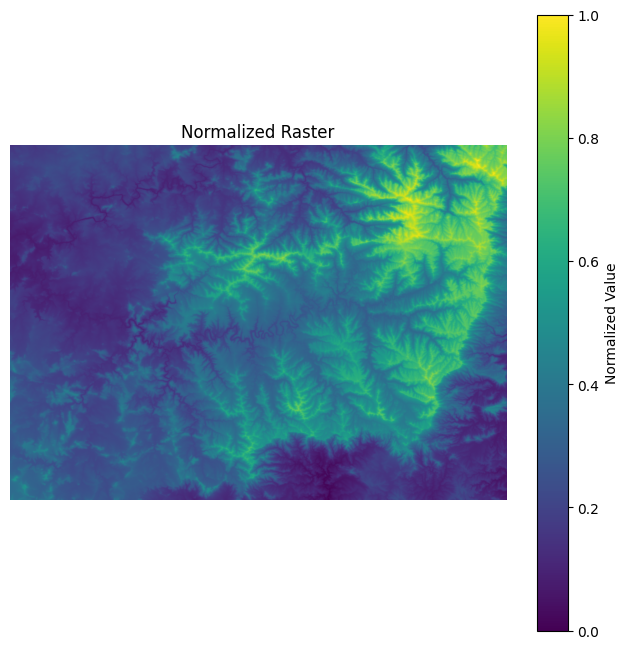

In [26]:
# 1. Scale the raster by a factor (e.g., convert elevation from meters to centimeters)
scaled_raster = masked_raster * 100

# 2. Apply thresholding (e.g., highlight elevation > 1000 m)
thresholded_raster = np.where(masked_raster > 1000, 1, 0)

# 3. Calculate slope-like differences between adjacent cells
gradient_y, gradient_x = np.gradient(masked_raster.filled(0))
slope_like = np.sqrt(gradient_x**2 + gradient_y**2)

# 4. Normalize raster values (e.g., 0 to 1)
raster_min = masked_raster.min()
raster_max = masked_raster.max()
normalized_raster = (masked_raster - raster_min) / (raster_max - raster_min)

# Plot the normalized results
plt.figure(figsize=(8, 8))
plt.imshow(normalized_raster, cmap='viridis')
plt.title("Normalized Raster")
plt.axis('off')
plt.colorbar(label='Normalized Value')
plt.show()

# Exercise: 

Play with these functions to make sure you understand them and ask if you have any questions. I might not know the answers out of my head, but we can explore how we should go about researching and implementing new code.